### Домашнее задание 1 (randomwalk)

In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
np.random.seed(42)
n = 1000

# Создаю вектор шагов в одну или другую сторону
steps = np.random.choice(np.array([-1, 1]), n-1, p=[0.5, 0.5])

# Добавляю исходное положение
steps = np.insert(steps, 0, 0)

# Создаю вектор траектории
trajectory = np.cumsum(steps)

#### мой тест
my_list = np.zeros(1000)
my_list[1:20] = 1
my_list[20:50] = -1
my_list[50:100] = -1
my_list[100:300] = -1
my_list[300:500] = 1
my_list[500:1000] = -1

trajectory = np.cumsum(my_list)
steps = my_list

##### Задание 1

In [40]:
max_t = max(trajectory)
min_t = min(trajectory)

print("Максимальное значение на траектории:", max_t)
print("Минимальное значение на траектории:",  min_t)

Максимальное значение на траектории: 19.0
Минимальное значение на траектории: -561.0


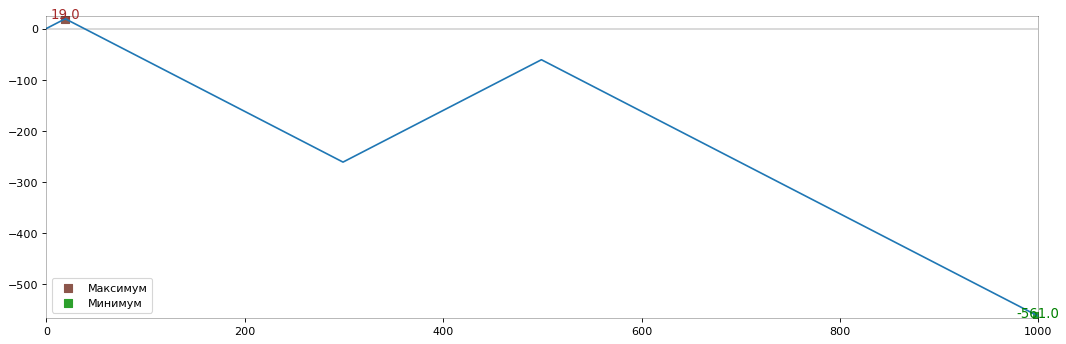

In [41]:
plt.figure(figsize=(16,5), dpi= 80)

# Прозрачность осей
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

# Горизонтальная линия на уровне 0 по y
plt.axhline(y=0, color='lightgrey', linestyle='-')

# Границы осей
plt.xlim(0,n)
plt.ylim(min_t-5, max_t+5)

# График, точки, подписи

plt.plot(trajectory)

top_indx = [i for i, x in enumerate(trajectory) if x == max_t]
low_indx = [i for i, x in enumerate(trajectory) if x == min_t]

plt.scatter(top_indx, trajectory[top_indx], marker = 's', color='tab:brown',  s=40, label='Максимум')
plt.scatter(low_indx, trajectory[low_indx], marker = 's', color='tab:green',  s=40, label='Минимум')

plt.text(top_indx[0], trajectory[top_indx[0]]+1.5, trajectory[top_indx[0]], horizontalalignment='center',
                                                                             color='brown', fontsize=12)
plt.text(low_indx[0], trajectory[low_indx[0]]-3.5, trajectory[low_indx[0]], horizontalalignment='center',
                                                                             color='green', fontsize=12)
plt.legend()


##### Задание 2

In [42]:
# Создаю вектор из длин маршрутов в одну сторону до смены направления
i=0
onewaysteps = []
onewaysum = 0

while i <(n-1):
    onewaysum = steps[i]
    if steps[i+1] == steps[i]:
        while steps[i+1] == steps[i]:
            onewaysum = onewaysum + steps[i+1]
            i=i+1
            if i==(n-1):
                break
    onewaysteps.append(onewaysum)
    i=i+1
    onewaysum = 0
if steps[n-2] != steps[n-1]:
    onewaysteps.append(steps[n-1])
    
np_onewaysteps = np.array(onewaysteps)   

In [43]:
largewalks_indx = [i for i, x in enumerate(abs(np_onewaysteps)) if x>10]
index = []

if(len(largewalks_indx)!=0):
    for i in range(len(largewalks_indx)):
        index.append(sum(abs(np.array(onewaysteps[0:largewalks_indx[i]])))+1)
    print("Значение индексов, начиная с которых будет сделано свыше 10 шагов в одну сторону:", index)
else:
    print("В данной случайной прогулке не было сделано больше 10 шагов в одну сторону.")

Значение индексов, начиная с которых будет сделано свыше 10 шагов в одну сторону: [1.0, 20.0, 300.0, 500.0]


TypeError: 'numpy.float64' object cannot be interpreted as an integer

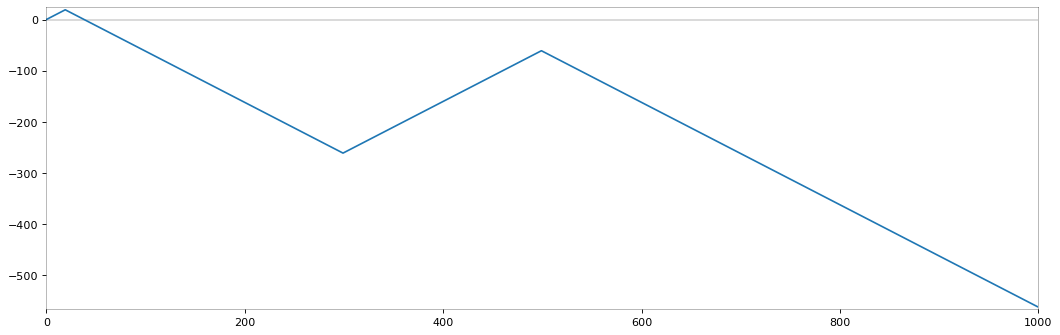

In [44]:
plt.figure(figsize=(16,5), dpi= 80)
 
# Прозрачность осей
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

# Горизонтальная линия на уровне 0 по y
plt.axhline(y=0, color='lightgrey', linestyle='-')

# Границы осей
plt.xlim(0,n)
plt.ylim(min_t-5, max_t+5)

# График

plt.plot(trajectory)

for i, j in zip(index, list(abs(np_onewaysteps[largewalks_indx]))):
    plt.plot(range(i,(i+j)), trajectory[range(i,(i+j))], linewidth=3,  label='Путь длины {}'.format(j))

# В этом задании у выделенных сегментов длины не обязательно равны (пример - np.random.seed(45)).
# Поэтому в легенде были оставлены повторы названий в случае равных длин. Это будет устранено в задании 3.
plt.legend()

##### Задание 3

In [ ]:
largestwalks_indx = [i for i, x in enumerate(abs(np_onewaysteps)) if x == max(abs(np_onewaysteps))]
index2 = []

for i in range(len(largestwalks_indx)):
    index2.append(sum(abs(np.array(onewaysteps[0:largestwalks_indx[i]])))+1)
                                                     
print("Значение индексов, начиная с которых будет сделано максимальное число шагов в одну сторону:", index2)

In [ ]:
plt.figure(figsize=(16,5), dpi= 80)

# Прозрачность осей
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

# Горизонтальная линия на уровне 0 по y
plt.axhline(y=0, color='lightgrey', linestyle='-')

# Границы осей
plt.xlim(0,n)
plt.ylim(min_t-5, max_t+5)

# График

plt.plot(trajectory)

for i, j in zip(index2, list(np_onewaysteps[largestwalks_indx])):
    plt.plot(range(i,(i+abs(j))), trajectory[range(i,(i+abs(j)))], 
             linewidth=3, color='orange', label='Путь длины {}'.format(abs(j)))
    
# В этом задании у всех отмеченных участков пути будет одна (максимальная) длина.
# Создаю словарь, чтобы в легенде не повторялись обозначения для каждого сегмента.
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())